# Lily

## Load Data

In [145]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

import warnings
warnings.filterwarnings('ignore')

In [157]:
data = pd.read_csv("dataframe.csv", delimiter="|")
data.tail()

,ID,referenceTime,originalSourceIds,title,lastName,firstName,middleName,streetAddress,state,zipcode,...,totalAssets,age,ageCategory,crmId,flagElitesMember,flagSelfSufficientsMember,flagNewWorldlyAdoptersMember,flagSafetySeekersMember,flagTraditionalistsMember,flagUpwardlyMobilesMember
50013,-4618209560386695881,2017-01-26T13:53:55.288Z,"[""""CRM:16017""""]",Ms.,Lacefield,Mary,P,1776 Patterson Street,TX,77002.0,...,29987.0,20.0,18-34,16017.0,0,0,0,0,0,0
50014,-4618028639641339898,2017-01-26T13:53:55.288Z,"[""""CRM:26883""""]",Mr.,Walker,Warren,L,498 Willison Street,MN,55429.0,...,28607.0,31.0,18-34,26883.0,0,0,0,0,0,0
50015,-4617960797035284685,2017-01-26T13:53:55.288Z,"[""""CRM:43096""""]",Dr.,Czajkowski,Eric,C,2246 Bicetown Road,NY,10013.0,...,25481.0,86.0,50 or older,43096.0,0,0,0,0,0,0
50016,-4617721746446202455,2017-01-26T13:53:55.288Z,"[""""CRM:10273""""]",Mrs.,Harris,Jana,J,1548 Watson Street,NJ,8102.0,...,38964.0,85.0,50 or older,10273.0,0,0,0,0,1,0
50017,-4616424157466986398,2017-01-26T13:53:55.288Z,"[""""CRM:22798""""]",Ms.,Foye,Jennie,R,2184 Heliport Loop,IN,47631.0,...,30969.0,40.0,35-49,22798.0,0,0,0,0,1,0


## Handle Missing Values

In [158]:
print(data.isnull().sum().sum(), 'Before deleting anything')
data.dropna(axis=1, thresh=1000, inplace=True)
print(data.isnull().sum().sum(), 'After deleting columns with less than 1000 non values')
data.flagStudent = data.flagStudent.apply(lambda x: 0 if np.isnan(x) else 1)
data.flagRetired = data.flagRetired.apply(lambda x: 0 if np.isnan(x) else 1)
data.flagHouseOwner = data.flagHouseOwner.apply(lambda x: 0 if np.isnan(x) else 1)
data.flagHomeTenant = data.flagHomeTenant.apply(lambda x: 0 if np.isnan(x) else 1)
data.flagValueProperty = data.flagValueProperty.apply(lambda x: 0 if np.isnan(x) else 1)
data.flagLandlord = data.flagLandlord.apply(lambda x: 0 if np.isnan(x) else 1)
data.flagWealthyRegion = data.flagWealthyRegion.apply(lambda x: 0 if np.isnan(x) else 1)
print(data.isnull().sum().sum(), 'After changing binary columns')
data.dropna(axis=0, inplace=True)
print(data.isnull().sum().sum(), 'After deleting rows with any missing values')

targets = data.loc[:,'monthlyIncomeReal']
data.drop('monthlyIncomeReal', axis=1, inplace=True)

data.drop(['ID', 'zipcode', 'crmId', 'referenceTime', 'originalSourceIds', 'lastName', 'firstName', 'middleName',
             'streetAddress', 'state', 'emailAddress', 'phoneNumber', 'occupation', 'resCity', 'resCountry'],
             axis=1, inplace=True)

714350 Before deleting anything
264188 After deleting columns with less than 1000 non values
414 After changing binary columns
0 After deleting rows with any missing values


In [159]:
data.tail()

,title,flagAlive,gender,lifestage,maritalStatus,education,flagStudent,flagRetired,nbrChildren,flagHouseOwner,...,nbrPropertiesOwned,totalAssets,age,ageCategory,flagElitesMember,flagSelfSufficientsMember,flagNewWorldlyAdoptersMember,flagSafetySeekersMember,flagTraditionalistsMember,flagUpwardlyMobilesMember
50013,Ms.,1,female,Younger Years Fiscal Fledlings,Single (never in legal unions),bachelor,1,0,0.0,0,...,0.0,29987.0,20.0,18-34,0,0,0,0,0,0
50014,Mr.,1,male,Younger Years Fiscal Fledlings,Single (never in legal unions),bachelor,0,0,1.0,0,...,0.0,28607.0,31.0,18-34,0,0,0,0,0,0
50015,Dr.,1,male,Mature Years,Married,associate,0,1,1.0,1,...,1.0,25481.0,86.0,50 or older,0,0,0,0,0,0
50016,Mrs.,1,female,Family Life,Divorced,associate,0,1,2.0,1,...,1.0,38964.0,85.0,50 or older,0,0,0,0,1,0
50017,Ms.,1,female,Family Life,Married,secondary,0,0,0.0,1,...,1.0,30969.0,40.0,35-49,0,0,0,0,1,0


In [160]:
dummies, nDummies = [], []
for i in range(len(data.columns)):
    possibleValues = len(data.iloc[:,i].unique())
    feature = data.columns[i]
    featureType = data.iloc[:,i].dtype
    if featureType == 'object' and possibleValues in range(2, 10):
        dummies.append(feature)
        print(feature, data.iloc[:,i].unique())
    else:
        nDummies.append(feature)

title ['Mr.' 'Mrs.' 'Ms.' 'Dr.']
gender ['male' 'female']
lifestage ['Mature Years' 'Younger Years Fiscal Fledlings' 'Younger Years'
 'Family Life']
maritalStatus ['Married' 'Single (never in legal unions)' 'In registered partnership'
 'Divorced' 'Widowed']
education ['associate' 'bachelor' 'doctoral' 'master' 'secondary' 'elementary'
 'first-professional degree']
ageCategory ['50 or older' '35-49' '18-34']


In [161]:
from sklearn.model_selection import train_test_split
trainX, validX, trainY, validY = train_test_split(data, targets, train_size=0.7, random_state=100)

In [162]:
from sklearn_pandas import DataFrameMapper
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import LabelBinarizer

mapper = DataFrameMapper(
    [(a, StandardScaler()) for a in nDummies] +
    [(d, LabelBinarizer()) for d in dummies]
)

In [163]:
from sklearn2pmml import PMMLPipeline
from sklearn.linear_model import Ridge

pipe = PMMLPipeline([
    ("mapper", mapper),
    ("regressor", Ridge(alpha=2))
])

In [164]:
pipe.fit(data, targets)
print(pipe.score(trainX, trainY))
print(pipe.score(validX, validY))

0.958086111282
0.957898036188


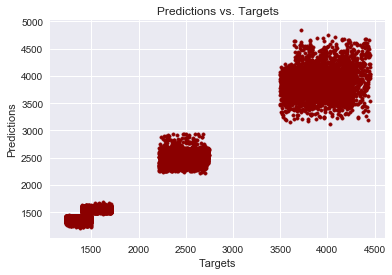

In [165]:
plt.scatter(validY, pipe.predict(validX), color="darkred", marker='.')
plt.title("Predictions vs. Targets")
plt.xlabel('Targets'); plt.ylabel('Predictions'); plt.grid(True)
plt.show()

In [166]:
from sklearn2pmml import sklearn2pmml
sklearn2pmml(pipe, "MetricModelDemo.xml")

CalledProcessError: Command '['java', '-cp', '/Users/desiredewaele/Library/Python/3.6/lib/python/site-packages/sklearn2pmml/resources/guava-20.0.jar:/Users/desiredewaele/Library/Python/3.6/lib/python/site-packages/sklearn2pmml/resources/istack-commons-runtime-2.21.jar:/Users/desiredewaele/Library/Python/3.6/lib/python/site-packages/sklearn2pmml/resources/jaxb-core-2.2.11.jar:/Users/desiredewaele/Library/Python/3.6/lib/python/site-packages/sklearn2pmml/resources/jaxb-runtime-2.2.11.jar:/Users/desiredewaele/Library/Python/3.6/lib/python/site-packages/sklearn2pmml/resources/jcommander-1.48.jar:/Users/desiredewaele/Library/Python/3.6/lib/python/site-packages/sklearn2pmml/resources/jpmml-converter-1.2.2.jar:/Users/desiredewaele/Library/Python/3.6/lib/python/site-packages/sklearn2pmml/resources/jpmml-lightgbm-1.0.3.jar:/Users/desiredewaele/Library/Python/3.6/lib/python/site-packages/sklearn2pmml/resources/jpmml-sklearn-1.2.8.jar:/Users/desiredewaele/Library/Python/3.6/lib/python/site-packages/sklearn2pmml/resources/jpmml-xgboost-1.1.6.jar:/Users/desiredewaele/Library/Python/3.6/lib/python/site-packages/sklearn2pmml/resources/pmml-agent-1.3.5.jar:/Users/desiredewaele/Library/Python/3.6/lib/python/site-packages/sklearn2pmml/resources/pmml-model-1.3.5.jar:/Users/desiredewaele/Library/Python/3.6/lib/python/site-packages/sklearn2pmml/resources/pmml-model-metro-1.3.5.jar:/Users/desiredewaele/Library/Python/3.6/lib/python/site-packages/sklearn2pmml/resources/pmml-schema-1.3.5.jar:/Users/desiredewaele/Library/Python/3.6/lib/python/site-packages/sklearn2pmml/resources/pyrolite-4.17.jar:/Users/desiredewaele/Library/Python/3.6/lib/python/site-packages/sklearn2pmml/resources/serpent-1.16.jar:/Users/desiredewaele/Library/Python/3.6/lib/python/site-packages/sklearn2pmml/resources/slf4j-api-1.7.22.jar:/Users/desiredewaele/Library/Python/3.6/lib/python/site-packages/sklearn2pmml/resources/slf4j-jdk14-1.7.22.jar', 'org.jpmml.sklearn.Main', '--pkl-pipeline-input', '/var/folders/zk/z53vrs154q5_w79596900sn80000gn/T/pipeline-k_h2asnd.pkl.z', '--pmml-output', 'MetricModelDemo.xml']' returned non-zero exit status 1.

# Iris

In [ ]:
import pandas as pd
from sklearn import datasets
iris = datasets.load_iris()
iris_df = pd.DataFrame(iris.data, columns=iris.feature_names)
iris_df.tail()

In [ ]:
from sklearn2pmml import PMMLPipeline
from sklearn.decomposition import PCA
from sklearn.feature_selection import SelectKBest
from sklearn.linear_model import LogisticRegression

In [ ]:
iris.target

In [ ]:
pipe = PMMLPipeline([
    ("pca", PCA(n_components = 3)),
    ("slectKbest", SelectKBest(2)),
    ("classifier", LogisticRegression())
])

In [ ]:
pipe.fit(iris_df, iris.target)

In [ ]:
from sklearn2pmml import sklearn2pmml
sklearn2pmml(iris_pipeline, "LogisticRegressionIris.xml", with_repr = True)

# Titanic

In [ ]:
rawData = pd.read_csv("titanic.csv")
rawData.head()

In [ ]:
targets = rawData.Survived
features = rawData[['Pclass', 'Sex', 'Age', 'SibSp', 'Parch', 'Fare', 'Embarked']]

In [ ]:
from sklearn.preprocessing import LabelEncoder

In [ ]:
from sklearn.preprocessing import OneHotEncoder
le = LabelEncoder(missing_values=-1)
features.loc[:,['Pclass', 'Sex', 'Embarked']] = features.loc[:,['Pclass', 'Sex', 'Embarked']].apply(LabelEncoder().fit_transform)

In [ ]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import Imputer
trainX, testX, trainY, testY = train_test_split(features, targets, random_state=0)

In [ ]:
from sklearn.preprocessing import Imputer
imp = Imputer(missing_values=-1)
imp.fit(trainX)
trainX = imp.transform(trainX)
testX = imp.transform(testX)